In [1]:
import pandas as pd
import psycopg2 as pg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
USER = "postgres"
PASSWORD = "postgres"
HOST = "localhost"
PORT = 5432
DB = "sales_data"

In [3]:
engine = pg.connect(f"dbname={DB} user={USER} host={HOST} port={PORT} password={PASSWORD}")


In [4]:
df_cust = pd.read_sql('select * from customers', con=engine)
df_cust.head()

/tmp/ipykernel_78038/227733469.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql('select * from customers', con=engine)


,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address
0,1,Stefanie,Y,Frye,79,97 Oak Avenue
1,2,Sandy,T,Kirby,96,52 White First Freeway
2,3,Lee,T,Zhang,55,921 White Fabien Avenue
3,4,Regina,S,Avery,40,75 Old Avenue
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue


In [5]:
df_count = pd.read_sql('select * from countries', con=engine)
df_count.head()

/tmp/ipykernel_78038/680188132.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_count = pd.read_sql('select * from countries', con=engine)


,CountryID,CountryName,CountryCode
0,1,Armenia,AN
1,2,Canada,FO
2,3,Belize,MK
3,4,Uganda,LV
4,5,Thailand,VI


In [6]:
df_city = pd.read_sql('select * from cities', con=engine)
df_city.head()

/tmp/ipykernel_78038/774300766.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_city = pd.read_sql('select * from cities', con=engine)


,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32
1,2,Buffalo,17420,32
2,3,Chicago,44751,32
3,4,Fremont,20641,32
4,5,Virginia Beach,62389,32


In [7]:
df_cust_city = pd.merge(df_cust, df_city, left_on='CityID', right_on='CityID', how='inner')
df_cust_city.head()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32
1,2,Sandy,T,Kirby,96,52 White First Freeway,Pittsburgh,14257,32
2,3,Lee,T,Zhang,55,921 White Fabien Avenue,Houston,95800,32
3,4,Regina,S,Avery,40,75 Old Avenue,Cleveland,51352,32
4,5,Daniel,S,Mccann,2,283 South Green Hague Avenue,Buffalo,17420,32


In [8]:
df_cc = df_cust_city.groupby('CityName')['CityName'].count().sort_values(ascending=False).to_frame()
df_cc = df_cc.rename(columns={'CityName': 'Count'})
df_cc = df_cc.reset_index()
df_cc.head()

,CityName,Count
0,Tucson,1104
1,Columbus,1096
2,Indianapolis,1090
3,Fort Wayne,1088
4,Sacramento,1085


<Figure size 2000x1500 with 0 Axes>

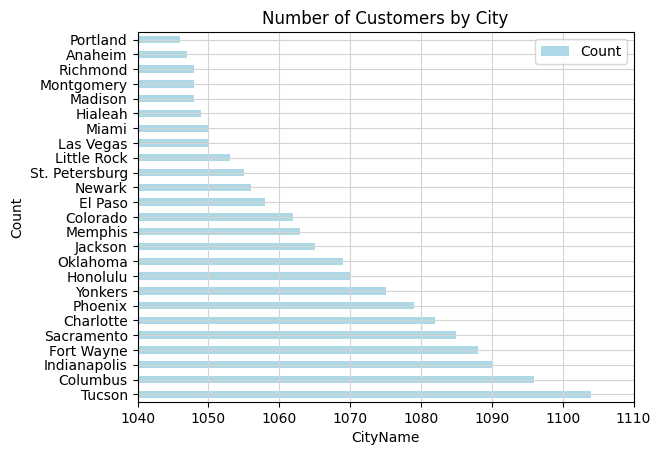

In [20]:
# Plot the top 25 cities
plt.figure(figsize=(20, 15))

df_cc.head(25)\
    .plot(
        x='CityName', 
        y='Count',
        kind='barh',
        color='lightblue'
        )
plt.grid(color='lightgrey')
plt.title("Number of Customers by City")
plt.xlabel("CityName")
plt.ylabel("Count")
plt.xlim(1040, 1110)
plt.show()

In [10]:
df_prod = pd.read_sql('select * from products', con=engine)
df_prod.head()

/tmp/ipykernel_78038/3348254541.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prod = pd.read_sql('select * from products', con=engine)


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0


In [11]:
df_cat = pd.read_sql('select * from categories', con=engine)
df_cat.head()

/tmp/ipykernel_78038/3224567898.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cat = pd.read_sql('select * from categories', con=engine)


,CategoryID,CategoryName
0,1,Confections
1,2,Shell fish
2,3,Cereals
3,4,Dairy
4,5,Beverages


In [12]:
df_prod_cat = pd.merge(df_prod, df_cat, left_on='CategoryID', right_on='CategoryID', how='inner')
df_prod_cat.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,CategoryName
0,1,Flour - Whole Wheat,74.2988,3,Medium,2018-02-16 08:21:49.190,Durable,Unknown,0.0,Cereals
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,2017-02-12 11:39:10.970,Unknown,Unknown,0.0,Cereals
2,3,Onions - Cippolini,9.1379,9,Medium,2018-03-15 08:11:51.560,Weak,False,111.0,Poultry
3,4,"Sauce - Gravy, Au Jus, Mix",54.3055,9,Medium,2017-07-16 00:46:28.880,Durable,Unknown,0.0,Poultry
4,5,Artichokes - Jerusalem,65.4771,2,Low,2017-08-16 14:13:35.430,Durable,True,27.0,Shell fish


In [13]:
df_pd = df_prod_cat.groupby('CategoryName')['CategoryName'].count().sort_values(ascending=False).to_frame()
df_pd = df_pd.rename(columns={'CategoryName': 'Count'})
df_pd = df_pd.reset_index()
df_pd.head()

,CategoryName,Count
0,Confections,57
1,Meat,50
2,Poultry,47
3,Cereals,45
4,Produce,43


<Figure size 2000x2000 with 0 Axes>

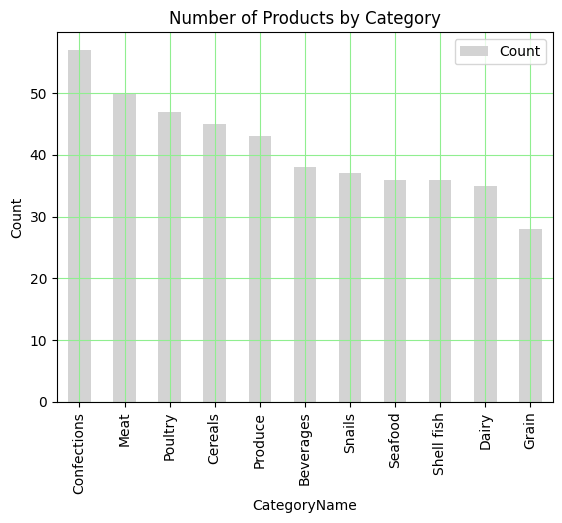

In [14]:
plt.figure(figsize=(20, 20))

df_pd.head(15)\
    .plot(
        x='CategoryName', 
        y='Count',
        kind='bar',
        color='lightgrey'
        )
plt.grid(color='lightgreen')
plt.title("Number of Products by Category")
plt.xlabel("CategoryName")
plt.ylabel("Count")
plt.show()